In [2]:
#| label: Iris
#| fig-cap: "Fig 1- Iris Dataset"

from sklearn import datasets
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

iris = datasets.load_iris()

# Converting Iris data into a pandas data frame
iris_df = pd.DataFrame(data=iris.data,  
                  columns=iris.feature_names)

iris_df['species'] = iris.target
print("Different Target species of Iris dataset are ", iris.target_names)
  
# Display dataframe
iris_df

Different Target species of Iris dataset are  ['setosa' 'versicolor' 'virginica']


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
#| label: bal

# Checking if the data is balanced or imbalanced
iris_df['species'].value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

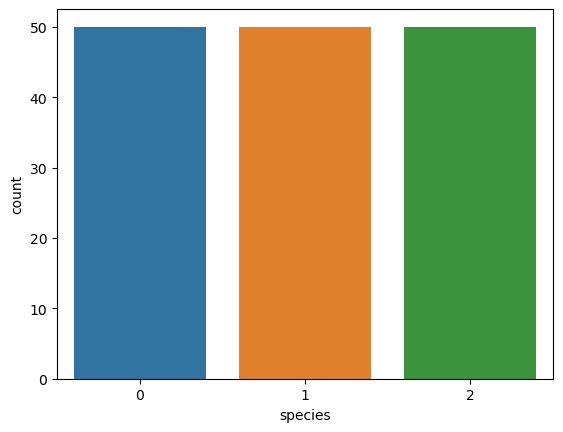

In [4]:
#| label: class_counts
#| fig-cap: "Fig 2- Iris Dataset species value counts"

# Plotting the class counts of target species
sns.countplot(iris_df['species']);

In [5]:
#| label: train_test_split

# Splitting features and target variables

X= iris_df.iloc[:,0:4]
y=iris_df.iloc[:,4]

# Splitting the dataset into train and test datasets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=5)

In [6]:
#| label: logistic_regression

# Let us now use supervised learning algorithms like Logistic regression for the classification task.
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
# Fitting Logistic regression on the train data
LR.fit(X_train,y_train)
#Predicting the output on test data using the trained Logistic regression model
y_pred=LR.predict(X_test)

In [7]:
#| label: logistic_regression_metrics

#Displaying classification metrics for Logistic regression
from sklearn.metrics import classification_report
print(classification_report(y_test,   y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      0.93      0.96        14
           2       0.92      1.00      0.96        12

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [8]:
#| label: logistic_regression_confusion_matrix

# Printing confusion matrix for Logistic regression
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  0, 12]], dtype=int64)

In [9]:
#| label: logistic_regression_accuracy

# Printing accuracy for Logistic regression
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of Logistic Regression model is ", accuracy)

Accuracy of Logistic Regression model is  97.36842105263158


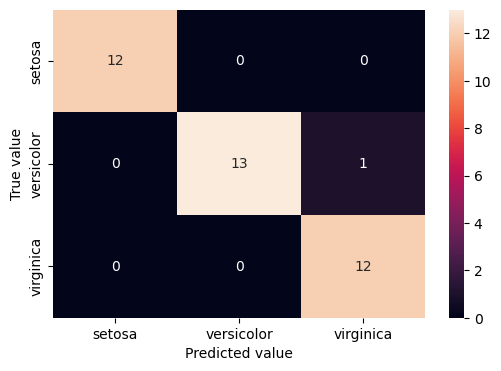

In [10]:
#| label: logistic_regression_heatmap
#| fig-cap: "Fig 3- Heatmap of confusion matrix for Logistic regression"

# Plotting heatmap of confusion matrix for Logistic regression

import seaborn as sns

cm  = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(6,4))

sns.heatmap(cm_df,   annot=True)

plt.ylabel('True value')

plt.xlabel('Predicted value')

plt.show()

In [11]:
#| label: Random_Forest

# Let us now use non lineaar supervised learning algorithms like Random forest which is an ensemble model for the classification task.
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(random_state=5)
# Fitting Random Forest on the train data
RF.fit(X_train,y_train)
#Predicting the output on test data using the trained Random forest model
y_pred=RF.predict(X_test)
y_pred

array([1, 1, 2, 0, 2, 1, 0, 2, 0, 1, 1, 1, 2, 2, 0, 0, 2, 2, 0, 0, 1, 2,
       0, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 0, 2])

In [12]:
#| label: Random_forest_metrics

#Displaying classification metrics for Random forest
from sklearn.metrics import classification_report
print(classification_report(y_test,   y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.87      0.93      0.90        14
           2       0.91      0.83      0.87        12

    accuracy                           0.92        38
   macro avg       0.93      0.92      0.92        38
weighted avg       0.92      0.92      0.92        38



In [13]:
#| label: Random_forest_confusion_matrix

# Printing confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[12,  0,  0],
       [ 0, 13,  1],
       [ 0,  2, 10]], dtype=int64)

In [14]:
#| label: Random_forest_accuracy

# Printing accuracy
accuracy=accuracy_score(y_test,y_pred)*100
print("Accuracy of Random forest model is ", accuracy)

Accuracy of Random forest model is  92.10526315789474


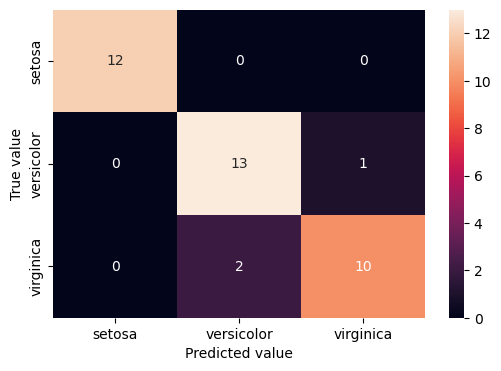

In [15]:
#| label: Random_forest_heatmap
#| fig-cap: "Fig 4- Heatmap of confusion matrix for Random forest"

# Plotting heatmap of confusion matrix for Random Forest

import seaborn as sns

cm  = confusion_matrix(y_test, y_pred) 

cm_df = pd.DataFrame(cm,index = ['setosa','versicolor','virginica'], columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(6,4))

sns.heatmap(cm_df,   annot=True)

plt.ylabel('True value')

plt.xlabel('Predicted value')

plt.show()